В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import importlib
import mlpeople.visualization.relationships.scatter as ml_opt_bool
importlib.reload(ml_opt_bool)
# import mlpeople.optimization as ml_opt
# importlib.reload(ml_opt)

<module 'mlpeople.visualization.relationships.scatter' from '/Users/maksymstefanko/ML/ML-love/data-loves-ml-for-people-course/src/mlpeople/visualization/relationships/scatter.py'>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm

from mlpeople.eda import describe_dataframe
from mlpeople.eda.categorization import encode_binary
from mlpeople.visualization.relationships.correlation import plot_correlation_heatmap
from mlpeople.visualization.relationships.scatter import plot_predicted_vs_actual
from mlpeople.models.linear import fit_ols_and_get_params

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
cars_df = pd.read_csv('data/cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [5]:
describe_dataframe(cars_df, skip_cols=["Car_ID"])

,column_id,data_type,unique_values,missing_values,mean,std,min,max
0,Brand,object,11,0,NaN,NaN,NaN,NaN
1,Model,object,58,0,NaN,NaN,NaN,NaN
2,Year,int64,6,0,2018.39,1.17,2016.0,2021.0
3,Kilometers_Driven,int64,18,0,28150.00,9121.38,10000.0,60000.0
4,Fuel_Type,object,2,0,NaN,NaN,NaN,NaN
5,Transmission,object,2,0,NaN,NaN,NaN,NaN
6,Owner_Type,object,3,0,NaN,NaN,NaN,NaN
7,Mileage,int64,15,0,17.21,3.31,10.0,25.0
8,Engine,int64,36,0,1855.23,631.31,999.0,4951.0
9,Power,int64,40,0,158.13,76.97,68.0,396.0


In [6]:
print(f'Numeric cols count: {len(cars_df.select_dtypes(include="number").columns)}')
print(f'Categorical cols count: {len(cars_df.select_dtypes(include="object").columns)}')

print("Categorical cols values report below:")
display(cars_df["Brand"].value_counts())
display(cars_df["Fuel_Type"].value_counts())
display(cars_df["Transmission"].value_counts())
display(cars_df["Owner_Type"].value_counts())


Numeric cols count: 8
Categorical cols count: 5
Categorical cols values report below:


Brand
Ford          11
Hyundai       11
Tata          11
Toyota        10
Volkswagen    10
Audi          10
BMW           10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

Owner_Type
First     44
Second    43
Third     13
Name: count, dtype: int64

<span style="background-color: #f60">Відповідь:</span><br/>
В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення) - Fuel_Type, Transmission
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку - Brand, Model
- 1 колонки, в яких можна встановити відношення порядку (First < Second < Third) - Owner_Type
- 1 числова ідентифікатор - Car_ID

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [7]:
cars_df.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [8]:
X = cars_df[['Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]
y = cars_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print(X_train.shape)
print(X_test.shape)

(80, 11)
(20, 11)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [9]:
# encode binary for both train and test
X_train["Fuel_Type_encoded"] = encode_binary(X_train, "Fuel_Type")
X_test["Fuel_Type_encoded"] = encode_binary(X_test, "Fuel_Type")
X_train["Transmission_encoded"] = encode_binary(X_train, "Transmission")
X_test["Transmission_encoded"] = encode_binary(X_test, "Transmission")

print(X_train.shape)
print(X_test.shape)

(80, 13)
(20, 13)


In [10]:
# OneHotEncoder for Brand
enc = OneHotEncoder()
enc.fit(X_train[['Brand']])
X_train[enc.categories_[0]] = enc.transform(X_train[['Brand']]).toarray()
X_test[enc.categories_[0]] = enc.transform(X_test[['Brand']]).toarray()


print(X_train.shape)
print(X_test.shape)

(80, 24)
(20, 24)


In [11]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [12]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_encoded,Transmission_encoded,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_encoded,Transmission_encoded,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

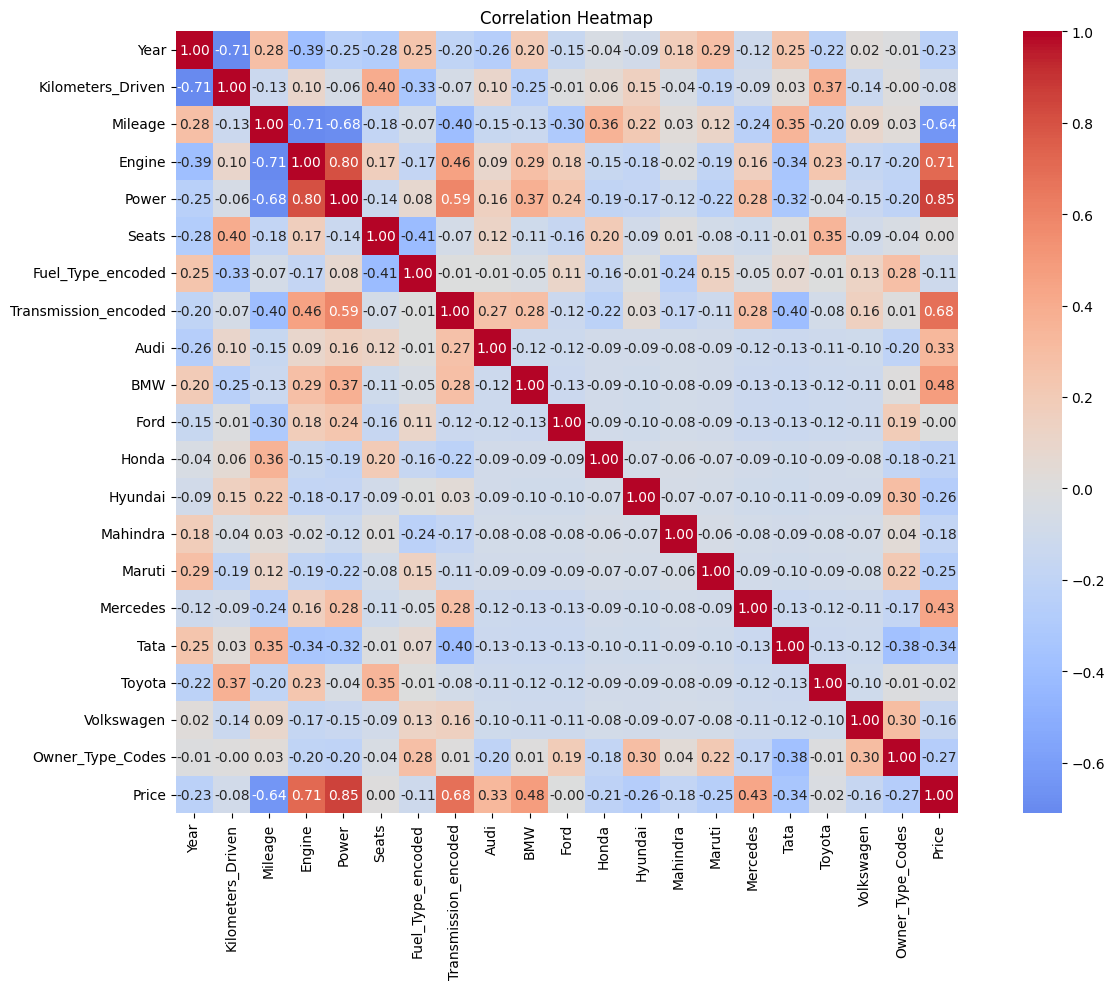

In [13]:
plot_correlation_heatmap(X_train, y)

<span style="background-color: #f60">Відповідь:</span><br/>
 - З цільовою змінною Price найбільше корелює значення колонки Power (0.85).
 - Серед інших колонок з абсолютним значенням кореляції більше за 0.5 наступні - Mileage, Engine, Transmission.
 - Також бачимо що певні бренди такі як BMW, Audi, Mercedes мають відносно високу позитивну кореляцію з Price, тоді як інші як Tata, Hundai, Maruti відносно високу негативну кореляцію з Price.

In [14]:
cars_df.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [15]:
X_train = X_train.select_dtypes(include="number")
X_test = X_test.select_dtypes(include="number")
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 83 to 75
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  80 non-null     int64  
 1   Kilometers_Driven     80 non-null     int64  
 2   Mileage               80 non-null     int64  
 3   Engine                80 non-null     int64  
 4   Power                 80 non-null     int64  
 5   Seats                 80 non-null     int64  
 6   Fuel_Type_encoded     80 non-null     int64  
 7   Transmission_encoded  80 non-null     int64  
 8   Audi                  80 non-null     float64
 9   BMW                   80 non-null     float64
 10  Ford                  80 non-null     float64
 11  Honda                 80 non-null     float64
 12  Hyundai               80 non-null     float64
 13  Mahindra              80 non-null     float64
 14  Maruti                80 non-null     float64
 15  Mercedes              80 non-

In [16]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_encoded,Transmission_encoded,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [17]:
import importlib
import mlpeople.optimization.boolean_flags as ml_opt_bool
importlib.reload(ml_opt_bool)
import mlpeople.optimization as ml_opt
importlib.reload(ml_opt)

<module 'mlpeople.optimization' from '/Users/maksymstefanko/ML/ML-love/data-loves-ml-for-people-course/src/mlpeople/optimization/__init__.py'>

In [18]:
# optimize memory usage - all binary flags to int8 type
from mlpeople.optimization import optimize_bool_flag_cols, get_all_bool_flag_cols

X_train = optimize_bool_flag_cols(X_train, flag_cols=get_all_bool_flag_cols(X_train))
X_test = optimize_bool_flag_cols(X_test, flag_cols=get_all_bool_flag_cols(X_test))
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 83 to 75
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  80 non-null     int64  
 1   Kilometers_Driven     80 non-null     int64  
 2   Mileage               80 non-null     int64  
 3   Engine                80 non-null     int64  
 4   Power                 80 non-null     int64  
 5   Seats                 80 non-null     int64  
 6   Fuel_Type_encoded     80 non-null     int8   
 7   Transmission_encoded  80 non-null     int8   
 8   Audi                  80 non-null     int8   
 9   BMW                   80 non-null     int8   
 10  Ford                  80 non-null     int8   
 11  Honda                 80 non-null     int8   
 12  Hyundai               80 non-null     int8   
 13  Mahindra              80 non-null     int8   
 14  Maruti                80 non-null     int8   
 15  Mercedes              80 non-

In [19]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_encoded,Transmission_encoded,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,2019,22000,18,1498,148,5,1,1,0,0,0,0,0,0,0,0,0,0,1,1.0
55,2018,28000,17,1968,187,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0.0
26,2018,28000,15,1984,241,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0.0
54,2017,32000,18,1598,103,5,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0
19,2017,26000,12,1991,241,5,1,1,0,0,0,0,0,0,0,1,0,0,0,1.0


In [20]:
model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train rmsa: {root_mean_squared_error(y_train, y_train_pred)}')
print(f'Test rmsa: {root_mean_squared_error(y_test, y_test_pred)}')

Train rmsa: 210342.8016204641
Test rmsa: 319012.6290059277


In [21]:
y_train.describe()

count    8.000000e+01
mean     1.680000e+06
std      1.040405e+06
min      4.500000e+05
25%      7.000000e+05
50%      1.500000e+06
75%      2.700000e+06
max      4.000000e+06
Name: Price, dtype: float64

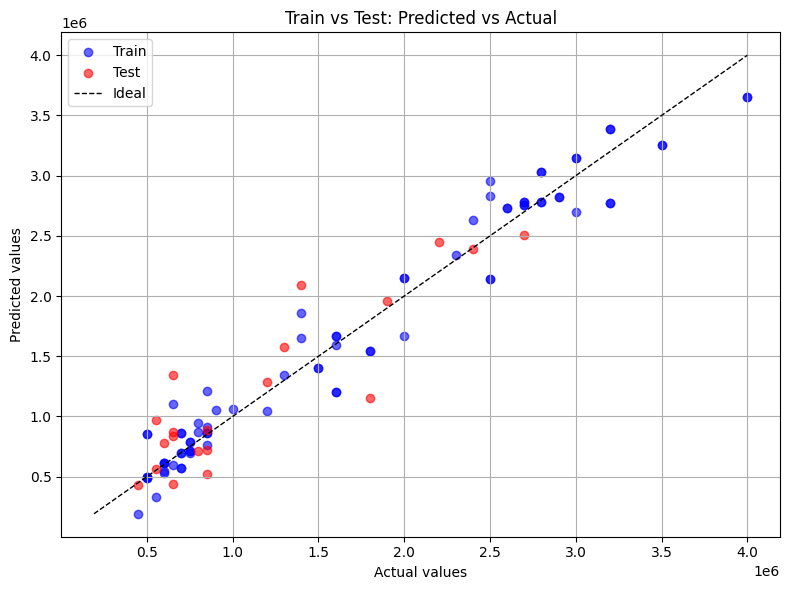

In [22]:
plot_predicted_vs_actual(
    y_train, y_train_pred,
    y_test, y_test_pred,
    title="Train vs Test: Predicted vs Actual",
)


<span style="background-color: #f60">Відповідь:</span><br/>
 - Здається що модель працює непогано і загалом прийнятно. Для кращого розуміння потрібно проаналізувати ще інші можливі метрики

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [23]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
cols = X_train.columns
X_train_scaled[cols] = scaler.fit_transform(X_train)
X_test_scaled[cols] = scaler.transform(X_test)

model_scaled = LinearRegression().fit(X_train_scaled, y_train)

weights_df = pd.DataFrame({
    'feature': np.append(cols, 1),
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
20,1,1.680000e+06
4,Power,5.000005e+05
15,Mercedes,2.092577e+05
9,BMW,2.081051e+05
8,Audi,2.061231e+05
7,Transmission_encoded,1.151534e+05
19,Owner_Type_Codes,4.333507e+04
17,Toyota,1.761943e+04
5,Seats,-1.744049e+03
0,Year,-1.160426e+04


<span style="background-color: #f60">Відповідь:</span><br/>
 - колонки Power, Mercedes, BMW, Audi, Fuel_Type_encoded є найвпливовішими на формування передбачення з точки зору коефіцієнтів
 - При цьому колонки Power, Mercedes, BMW, Audi, Transmission_encoded мають позитивний напрям дії (збільшення ціни), а Fuel_Type_encoded, Hyundai, Mahindra, Mileage негативни напрям дії (зменшення ціни). Це загалом узгоджується з кореляціями відповідних колонок які ми отримали на попередньому етапі

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [24]:
results, params = fit_ols_and_get_params(X_train_scaled, y_train, drop_const=True)
params

Power                   500000.506765
Mercedes                209257.737636
BMW                     208105.079738
Audi                    206123.092108
Transmission_encoded    115153.439599
Owner_Type_Codes         43335.066079
Toyota                   17619.429555
Seats                    -1744.048812
Year                    -11604.260975
Engine                  -24683.084080
Honda                   -63112.339850
Tata                    -65558.490423
Volkswagen              -93391.358093
Kilometers_Driven       -99713.958682
Maruti                 -112786.673613
Ford                   -119069.155830
Mileage                -131884.633123
Mahindra               -140931.632855
Hyundai                -151916.052473
Fuel_Type_encoded      -185245.840763
dtype: float64

In [25]:
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           2.34e-34
Time:                        14:35:44   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.68e+06   2.72e+04     61.867      0.000    1.63e+06    1.73e+06
Year                  -1.16e+04    5.8e+04     -0.200      0.842   -1.28e+05    1.04e+05
Kilometers_Driven    -9.971e+04   5.63e+04     -1.772      0.082   -2.12e+05    1.29e+04
Mileage              -1.319e+05   5.78e+04     -2.281      0.026   -2.48e+05   -1.62e+04
Engine               -2.468e+04   6.95e+04     -0.355      0.724   -1.64e+05    1.14e+05
Power                     5e+05   7.23e+04      6.919      0.000    3.55e+05    6.45e+05
Seats                -1744.0488   4.18e+04     -0.042      0.967   -8.53e+04    8.18e+04
Fuel_Type_encoded    -1.852e+05   4.45e+04     -4.161      0.000   -2.74e+05   -9.62e+04
Transmission_encoded  1.152e+05   4.26e+04      2.700      0.009    2.98e+04       2e+05
Audi                  2.061e+05   3.01e+04      6.848      0.000    1.46e+05    2.66e+05
BMW                   2.081e+05   3.16e+04      6.586      0.000    1.45e+05    2.71e+05
Ford                 -1.191e+05    3.3e+04     -3.604      0.001   -1.85e+05    -5.3e+04
Honda                -6.311e+04    3.4e+04     -1.855      0.069   -1.31e+05    4956.425
Hyundai              -1.519e+05   2.87e+04     -5.293      0.000   -2.09e+05   -9.45e+04
Mahindra             -1.409e+05   2.94e+04     -4.786      0.000      -2e+05    -8.2e+04
Maruti               -1.128e+05   2.87e+04     -3.929      0.000    -1.7e+05   -5.54e+04
Mercedes              2.093e+05   3.08e+04      6.790      0.000    1.48e+05    2.71e+05
Tata                 -6.556e+04   3.91e+04     -1.679      0.098   -1.44e+05    1.26e+04
Toyota                1.762e+04   3.26e+04      0.540      0.591   -4.77e+04    8.29e+04
Volkswagen           -9.339e+04   2.97e+04     -3.148      0.003   -1.53e+05    -3.4e+04
Owner_Type_Codes      4.334e+04   4.67e+04      0.927      0.357   -5.01e+04    1.37e+05
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.272
Skew:                           0.093   Prob(JB):                        0.873
Kurtosis:                       2.784   Cond. No.                     4.44e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
pvalues = results.pvalues
significant_params = params[pvalues < 0.05]
insignificant_params = params[pvalues >= 0.05]
print(f'Statistically Significant:\n {significant_params}')
print(f'Statistically Insignificant:\n {insignificant_params}')

Statistically Significant:
 Power                   500000.506765
Mercedes                209257.737636
BMW                     208105.079738
Audi                    206123.092108
Transmission_encoded    115153.439599
Volkswagen              -93391.358093
Maruti                 -112786.673613
Ford                   -119069.155830
Mileage                -131884.633123
Mahindra               -140931.632855
Hyundai                -151916.052473
Fuel_Type_encoded      -185245.840763
dtype: float64
Statistically Insignificant:
 Owner_Type_Codes     43335.066079
Toyota               17619.429555
Seats                -1744.048812
Year                -11604.260975
Engine              -24683.084080
Honda               -63112.339850
Tata                -65558.490423
Kilometers_Driven   -99713.958682
dtype: float64


In [27]:
significant_params.index

Index(['Power', 'Mercedes', 'BMW', 'Audi', 'Transmission_encoded',
       'Volkswagen', 'Maruti', 'Ford', 'Mileage', 'Mahindra', 'Hyundai',
       'Fuel_Type_encoded'],
      dtype='object')

<span style="background-color: #f60">Відповідь:</span><br/>
 - 'Power', 'Mercedes', 'BMW', 'Audi', 'Transmission_encoded','Volkswagen', 'Maruti', 'Ford', 'Mileage', 'Mahindra', 'Hyundai', 'Fuel_Type_encoded' є стат значущими на рівні значущості 0.05

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [28]:
results_005, params_005 = fit_ols_and_get_params(X_train_scaled, y_train, include_cols=significant_params.index, drop_const=True)
params_005

Power                   455615.175147
BMW                     294978.058831
Mercedes                276729.143651
Audi                    249689.484891
Transmission_encoded    131077.787603
Volkswagen              -23752.008577
Ford                    -48552.113344
Maruti                  -51178.806925
Mahindra                -85382.138739
Hyundai                -102747.928227
Fuel_Type_encoded      -133714.071958
Mileage                -143009.405300
dtype: float64

In [29]:
display(results_005.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           4.12e-39
Time:                        14:35:44   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.68e+06   2.78e+04     60.360      0.000    1.62e+06    1.74e+06
Power                 4.556e+05    5.1e+04      8.941      0.000    3.54e+05    5.57e+05
Mercedes              2.767e+05   3.68e+04      7.515      0.000    2.03e+05     3.5e+05
BMW                    2.95e+05   3.78e+04      7.802      0.000     2.2e+05     3.7e+05
Audi                  2.497e+05   3.53e+04      7.075      0.000    1.79e+05     3.2e+05
Transmission_encoded  1.311e+05    4.3e+04      3.046      0.003    4.52e+04    2.17e+05
Volkswagen           -2.375e+04    3.4e+04     -0.699      0.487   -9.16e+04    4.41e+04
Maruti               -5.118e+04   3.07e+04     -1.665      0.101   -1.13e+05    1.02e+04
Ford                 -4.855e+04   3.52e+04     -1.378      0.173   -1.19e+05    2.18e+04
Mileage               -1.43e+05   4.02e+04     -3.561      0.001   -2.23e+05   -6.29e+04
Mahindra             -8.538e+04   3.02e+04     -2.825      0.006   -1.46e+05    -2.5e+04
Hyundai              -1.027e+05   3.17e+04     -3.238      0.002   -1.66e+05   -3.94e+04
Fuel_Type_encoded    -1.337e+05   2.99e+04     -4.479      0.000   -1.93e+05   -7.41e+04
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.084
Skew:                           0.279   Prob(JB):                        0.582
Kurtosis:                       2.879   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="background-color: #f60">Відповідь:</span><br/>
 - Показники R-squared і Adj. R-squared змінились не сильно і стали зовсім трохи меншими. Але по суті ми досягли майже тих же результатів використовуючи меншу кількість ознак
 - Також цікаво що після відкидання статистично незначущих ознак у новій моделі незначущими виявились деякі попередньо значущі, такі як Ford, Maruti, Volkswagen

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [30]:
significant_params_025 = params[pvalues < 0.25]
print(f'Statistically Significant (p-value > 0.25):\n {significant_params_025}')

Statistically Significant (p-value > 0.25):
 Power                   500000.506765
Mercedes                209257.737636
BMW                     208105.079738
Audi                    206123.092108
Transmission_encoded    115153.439599
Honda                   -63112.339850
Tata                    -65558.490423
Volkswagen              -93391.358093
Kilometers_Driven       -99713.958682
Maruti                 -112786.673613
Ford                   -119069.155830
Mileage                -131884.633123
Mahindra               -140931.632855
Hyundai                -151916.052473
Fuel_Type_encoded      -185245.840763
dtype: float64


In [31]:
results_025, params_025 = fit_ols_and_get_params(X_train_scaled, y_train, include_cols=significant_params_025.index, drop_const=True)
params_025

Power                   466661.812635
BMW                     209273.347898
Mercedes                204805.597678
Audi                    194955.626613
Transmission_encoded    117541.463987
Kilometers_Driven       -78873.956584
Honda                   -79749.136339
Volkswagen              -90729.863581
Tata                    -97008.321969
Ford                   -113997.533854
Maruti                 -115925.580435
Mileage                -121323.199900
Mahindra               -144425.651786
Hyundai                -151815.666440
Fuel_Type_encoded      -162944.181133
dtype: float64

In [32]:
display(results_025.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           4.85e-38
Time:                        14:35:46   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.68e+06   2.65e+04     63.341      0.000    1.63e+06    1.73e+06
Power                 4.667e+05   4.93e+04      9.475      0.000    3.68e+05    5.65e+05
Mercedes              2.048e+05    4.2e+04      4.874      0.000    1.21e+05    2.89e+05
BMW                   2.093e+05   4.53e+04      4.620      0.000    1.19e+05       3e+05
Audi                   1.95e+05   3.86e+04      5.051      0.000    1.18e+05    2.72e+05
Transmission_encoded  1.175e+05   4.15e+04      2.832      0.006    3.46e+04       2e+05
Honda                -7.975e+04   3.83e+04     -2.085      0.041   -1.56e+05   -3324.825
Tata                 -9.701e+04   4.27e+04     -2.269      0.027   -1.82e+05   -1.16e+04
Volkswagen           -9.073e+04   3.94e+04     -2.304      0.024   -1.69e+05   -1.21e+04
Kilometers_Driven    -7.887e+04   3.47e+04     -2.275      0.026   -1.48e+05   -9600.782
Maruti               -1.159e+05   3.64e+04     -3.189      0.002   -1.89e+05   -4.33e+04
Ford                  -1.14e+05      4e+04     -2.851      0.006   -1.94e+05   -3.41e+04
Mileage              -1.213e+05   4.52e+04     -2.685      0.009   -2.12e+05    -3.1e+04
Mahindra             -1.444e+05   3.47e+04     -4.163      0.000   -2.14e+05   -7.51e+04
Hyundai              -1.518e+05    3.7e+04     -4.107      0.000   -2.26e+05    -7.8e+04
Fuel_Type_encoded    -1.629e+05   3.14e+04     -5.184      0.000   -2.26e+05      -1e+05
==============================================================================
Omnibus:                        0.317   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.436
Skew:                           0.137   Prob(JB):                        0.804
Kurtosis:                       2.763   Cond. No.                         5.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="background-color: #f60">Відповідь:</span><br/>
 - Показники R-squared і Adj. R-squared змінились не сильно, але при цьому Adj. R-squared навіть збільшилось на 0.002
 - Загалом виглядає що всі три моделі будуть давати приблизно однакові результати, але для уникнення зайвого шуму оптимальним варіантом використання може бути модель де ми відкинули ознаки з p>0.25